# Benchmarks of Fuzzy Time Series Models

In [1]:
library(repr)
options(warn=-1)
options(repr.plot.width=10, repr.plot.height=5)

source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

# Load Datasets

## Enrollments

      Year       Enrollments   
 Min.   :1971   Min.   :13055  
 1st Qu.:1976   1st Qu.:15200  
 Median :1982   Median :15732  
 Mean   :1982   Mean   :16194  
 3rd Qu.:1987   3rd Qu.:16904  
 Max.   :1992   Max.   :19337  

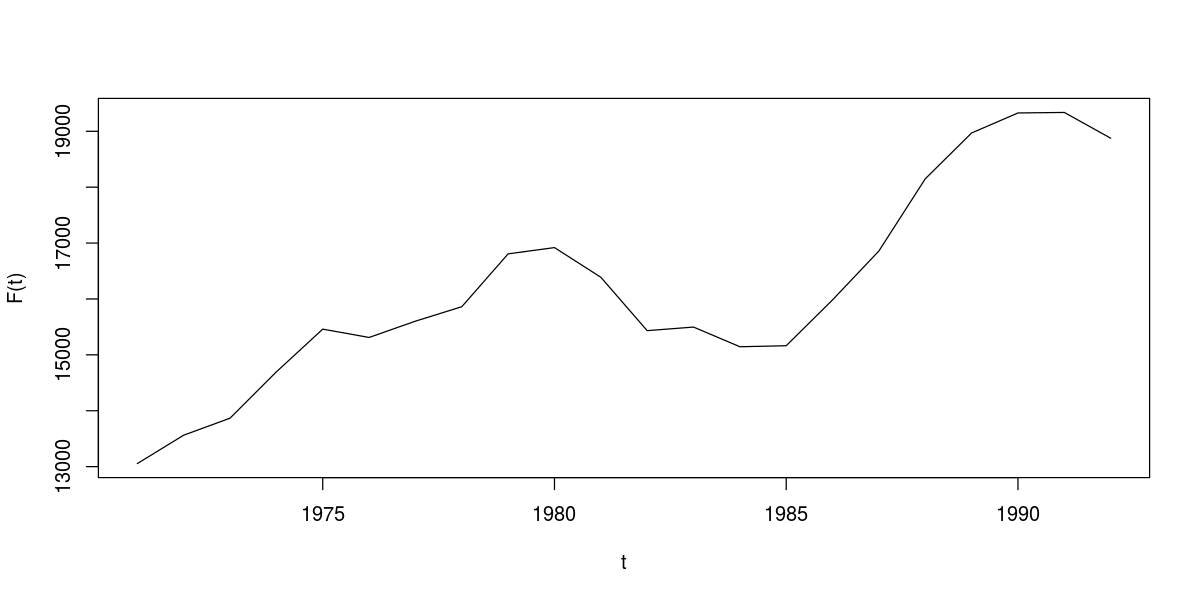

In [2]:
enrollments <- read.csv("/home/petronio/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/DataSets/Enrollments.csv",sep=";")

#denrollments <- data.frame(enrollments$Year, c(NA,D(enrollments$Enrollments,1)))
#names(denrollments) <- c("Year","Enrollments")

summary(enrollments)

options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(2,1))
plot(enrollments,type="l",xlab="t",ylab="F(t)")
#plot(denrollments,type="h")
#abline(h=0)

## TAIEX

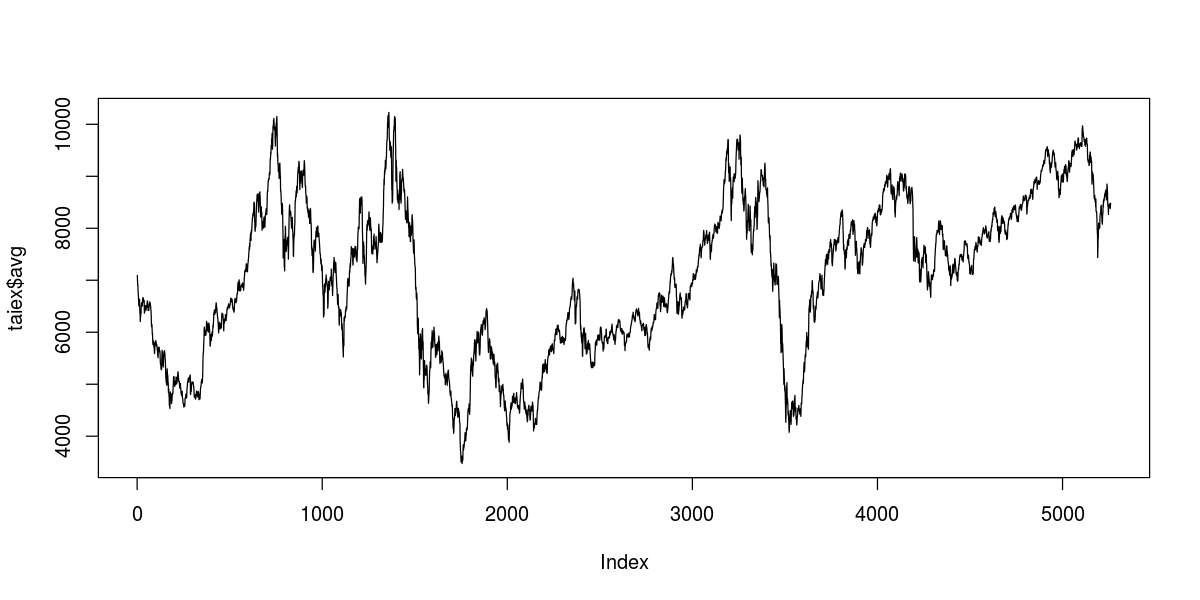

In [3]:
#rm(tmp)
#rm(taiex)
tmp <- read.csv("/home/petronio/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/DataSets/TAIEX.csv",sep=",") #, nrows=2000)

taiex <- tmp[c("Date","avg")]
taiex$Date <- as.Date(taiex$Date)
rownames(taiex) <- 1:nrow(taiex)

#dtaiex <- data.frame(taiex$Date, c(NA,D(taiex$avg,1)))
#names(dtaiex) <- c("Date","avg")

options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(2,1))
plot(taiex$avg,type="l")
#plot(dtaiex,type="h")
#abline(h=0)

#summary(taiex)

## NASDAQ

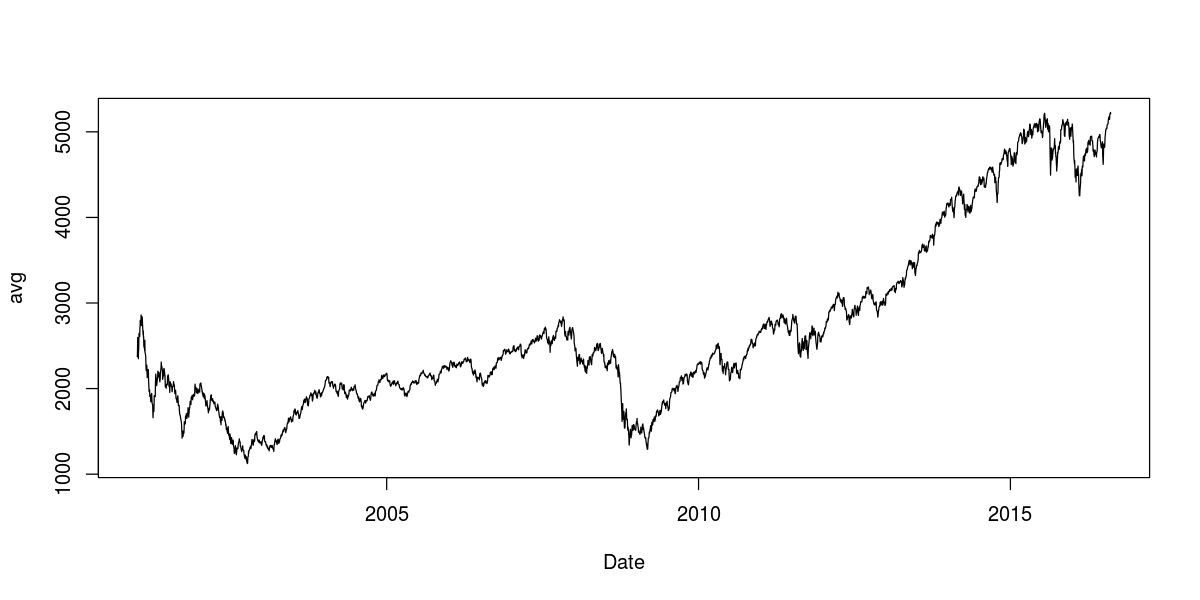

In [53]:
tmp <- read.csv("/home/petronio/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/DataSets/NASDAQ_IXIC.csv",sep=",") #, nrows=2000)



nasdaq <- tmp[c("Date","avg")]
nasdaq$Date <- as.Date(nasdaq$Date)
rownames(nasdaq) <- 1:nrow(nasdaq)

#nasdaq

#dtaiex <- data.frame(taiex$Date, c(NA,D(taiex$avg,1)))
#names(dtaiex) <- c("Date","avg")

options(repr.plot.width=10, repr.plot.height=5)
#par(mfrow=c(2,1))
plot(nasdaq,type="l")
#plot(dtaiex,type="h")
#abline(h=0)

#summary(taiex)

## Conventional FTS (Chen)

In [8]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fit <- FitChenFTS(enrollments$Enrollments,7,trimf,NULL)
fts <- fit$train();
sprintf(fts$dump())

[1] " \n A1 -> A1 \n A2 -> A2, A3 \n A3 -> A4 \n A4 -> A4, A5 \n A5 -> A4, A5, A6 \n A6 -> A7 \n A7 -> A7"

## Weighted FTS (Yu)

In [9]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fitw <- FitYuFTS(enrollments$Enrollments,7,trimf,NULL)
wfts <- fitw$train();
sprintf(wfts$dump())

[1] " \n A1 -> 1 * A1 \n A2 -> 0.17 * A2, 0.33 * A2, 0.5 * A3 \n A3 -> 1 * A4 \n A4 -> 0.02 * A4, 0.04 * A4, 0.07 * A4, 0.09 * A4, 0.11 * A4, 0.13 * A4, 0.16 * A4, 0.18 * A5, 0.2 * A5 \n A5 -> 0.1 * A4, 0.2 * A5, 0.3 * A5, 0.4 * A6 \n A6 -> 1 * A7 \n A7 -> 0.17 * A7, 0.33 * A7, 0.5 * A7"

## IWFTS (Ismail & Efendi)

In [10]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fite <- FitEfendiFTS(taiex$avg[2500:4000],25,trimf,NULL)
efts <- fite$train();
sprintf(efts$dump())

[1] "1 \n \n A1 -> 1*A1 \n \n A2 -> 0.5*A2, 0.5*A3 \n \n A3 -> 0.68*A3, 0.26*A4, 0.06*A2 \n \n A4 -> 0.18*A3, 0.73*A4, 0.09*A5 \n \n A5 -> 0.2*A6, 0.53*A5, 0.27*A4 \n \n A6 -> 0.2*A7, 0.5*A6, 0.3*A5 \n \n A7 -> 0.77*A7, 0.15*A6, 0.08*A8 \n \n A8 -> 0.5*A8, 0.39*A9, 0.06*A7, 0.06*A10 \n \n A9 -> 0.81*A9, 0.13*A10, 0.06*A8 \n \n A10 -> 0.85*A10, 0.09*A9, 0.06*A11, 0.01*A8 \n \n A11 -> 0.79*A11, 0.07*A10, 0.14*A12 \n \n A12 -> 0.1*A11, 0.8*A12, 0.1*A13 \n \n A13 -> 0.73*A13, 0.14*A12, 0.14*A14 \n \n A14 -> 0.76*A14, 0.11*A15, 0.12*A13 \n \n A15 -> 0.13*A14, 0.73*A15, 0.14*A16 \n \n A16 -> 0.08*A15, 0.75*A16, 0.17*A17 \n \n A17 -> 0.13*A16, 0.77*A17, 0.1*A18 \n \n A18 -> 0.76*A18, 0.11*A17, 0.12*A19, 0.01*A20, 0.01*A16 \n \n A19 -> 0.68*A19, 0.21*A18, 0.12*A20 \n \n A20 -> 0.6*A20, 0.18*A21, 0.2*A19, 0.02*A22 \n \n A21 -> 0.57*A21, 0.24*A22, 0.02*A19, 0.17*A20 \n \n A22 -> 0.69*A22, 0.22*A21, 0.1*A23 \n \n A23 -> 0.56*A23, 0.17*A24, 0.28*A22 \n \n A24 -> 0.77*A24, 0.18*A25, 0.05*A23 \n \n A25 -> 0.64*A25, 0.18*A23, 0.18*A24"

## EWFTS (Sadaei)

In [11]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")
fits <- FitSadaeiFTS(enrollments$Enrollments,6,trimf,1.2)
sfts <- fits$train();
sprintf(sfts$dump())

[1] " \n \n A1 -> 1*A1 \n \n A2 -> 0.27*A2, 0.33*A2, 0.4*A3 \n \n A3 -> 0.08*A3, 0.09*A3, 0.11*A4, 0.13*A3, 0.16*A3, 0.19*A3, 0.23*A4 \n \n A4 -> 0.1*A4, 0.12*A4, 0.15*A5, 0.17*A3, 0.21*A4, 0.25*A5 \n \n A5 -> 0.45*A4, 0.55*A6 \n \n A6 -> 0.27*A6, 0.33*A6, 0.4*A6"

## IFTS

In [12]:
fiti <- FitIFTS(enrollments$Enrollments,7,trimf,NULL)
ifts <- fiti$train();
sprintf(ifts$dump())
ifts$forecast(15000)
#pfts$fuzzySets

[1] " \n A1 -> A1 \n A2 -> A2, A3 \n A3 -> A4 \n A4 -> A4, A5 \n A5 -> A4, A5, A6 \n A6 -> A7 \n A7 -> A7"

NA,NA
14465.24,17307.67


In [13]:
pfts$fuzzySets$A4$membership(16894)
pfts$fuzzySets$A5$membership(16894)

ERROR: Error in eval(expr, envir, enclos): object 'pfts' not found


ERROR: Error in eval(expr, envir, enclos): object 'pfts' not found


In [7]:
fitiw <- FitIWFTS(enrollments$Enrollments,8,trimf,NULL)
iwfts <- fitiw$train();
sprintf(iwfts$dump())
iwfts$forecast(5000)

[1] "1 \n \n A1 -> 1*A1 \n \n A2 -> 0.5*A2, 0.5*A3 \n \n A3 -> 0.5*A3, 0.5*A4 \n \n A4 -> 0.714285714285714*A4, 0.285714285714286*A5 \n \n A5 -> 0.666666666666667*A6, 0.333333333333333*A4 \n \n A6 -> 0.333333333333333*A6, 0.333333333333333*A5, 0.333333333333333*A7 \n \n A7 -> 1*A8 \n \n A8 -> 1*A8"

NA,NA
0,0


# BENCHMARKS

## TAIEX

In [8]:
subset <- taiex$avg[800:1000]

options(repr.plot.width=10, repr.plot.height=5)

plot(subset,type="l",xlab="t",ylab="F(t)")

l <- length(subset)

prevs <- matrix(rep(0,l*2),l,2)

#prevs_p <- pfts$forecast(subset)
prevs_iw <- iwfts$forecast(subset)

#lines(seq(1,l+1),prevs_p[,1],col="red")
lines(seq(1,l+1),prevs_iw[,1],col="green")
#lines(seq(1,l+1),prevs_p[,2],col="red")
lines(seq(1,l+1),prevs_iw[,2],col="green")

#legend("topright",legend=c("PFTS","PWFTS"), fill=c("red","green"))

ERROR: Error in eval(expr, envir, enclos): object 'taiex' not found


ERROR: Error in subset.default(x): argument "subset" is missing, with no default


ERROR: Error in x[k]: object of type 'closure' is not subsettable


ERROR: Error in xy.coords(x, y): object 'prevs_iw' not found


ERROR: Error in xy.coords(x, y): object 'prevs_iw' not found


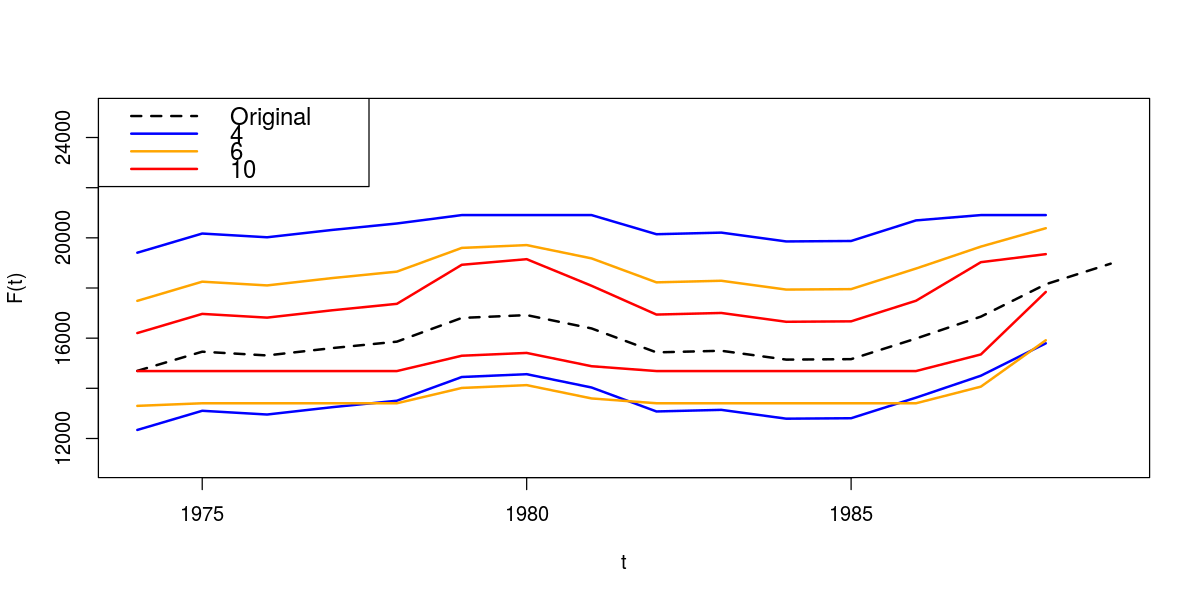

In [44]:
fiti5 <- FitIFTS(enrollments$Enrollments,4,trimf,NULL)
ifts5 <- fiti5$train();

fiti6 <- FitIFTS(enrollments$Enrollments,6,trimf,NULL)
ifts6 <- fiti6$train();

fiti7 <- FitIFTS(enrollments$Enrollments,10,trimf,NULL)
ifts7 <- fiti7$train();



subset <- enrollments$Enrollments[4:19]

options(repr.plot.width=10, repr.plot.height=5)

plot(enrollments$Year[4:19],subset,type="l",xlab="t",ylab="F(t)",ylim=c(11000,25000), lwd=2, lty=2)

l <- length(subset)

prevs <- matrix(rep(0,l*2),l,2)

p5 <- ifts5$forecast(subset)
lines(enrollments$Year[4:18],p5[2:l,1],col="blue",lwd=2)
lines(enrollments$Year[4:18],p5[2:l,2],col="blue",lwd=2)

p6 <- ifts6$forecast(subset)
lines(enrollments$Year[4:18],p6[2:l,1],col="orange",lwd=2)
lines(enrollments$Year[4:18],p6[2:l,2],col="orange",lwd=2)

p7 <- ifts7$forecast(subset)
lines(enrollments$Year[4:18],p7[2:l,1],col="red",lwd=2)
lines(enrollments$Year[4:18],p7[2:l,2],col="red",lwd=2)

legend("topleft",legend=c("Original",ifts5$npart,ifts6$npart,ifts7$npart), 
       col=c("black", "blue","orange","red"), lwd=c(2,2,2,2), lty=c(2,1,1,1), cex=1.2)

In [56]:
Sharpness(p7)
ifts7$fuzzySets[[1]]$upper - ifts7$fuzzySets[[1]]$lower

[1] 2475.775

[1] 1507.68

   Partition Length Interval Length
4          4711.500        6608.797
6          2792.000        4860.562
10         1507.680        2475.775

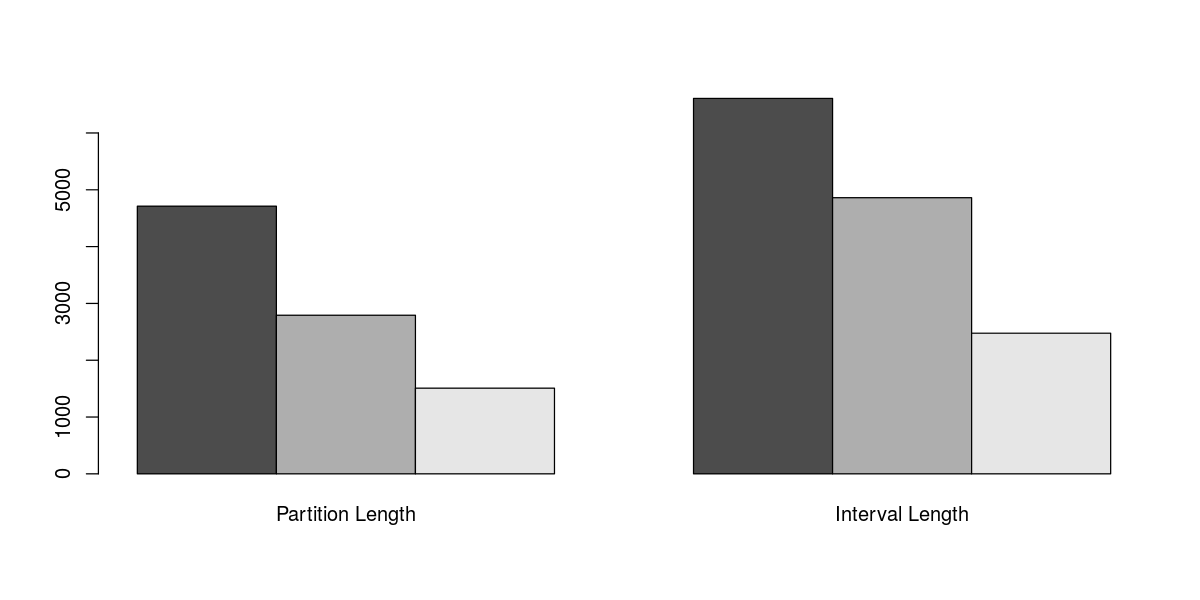

In [61]:
intervals <- matrix(c(4711.5, 6608.796875, 2792, 4860.5625, 1507.68, 2475.775), ncol=2, byrow=TRUE )
colnames(intervals) <- c("Partition Length", "Interval Length")
rownames(intervals) <- c("4", "6", "10")
intervals <- as.table(intervals)
intervals
barplot(intervals,beside=TRUE)

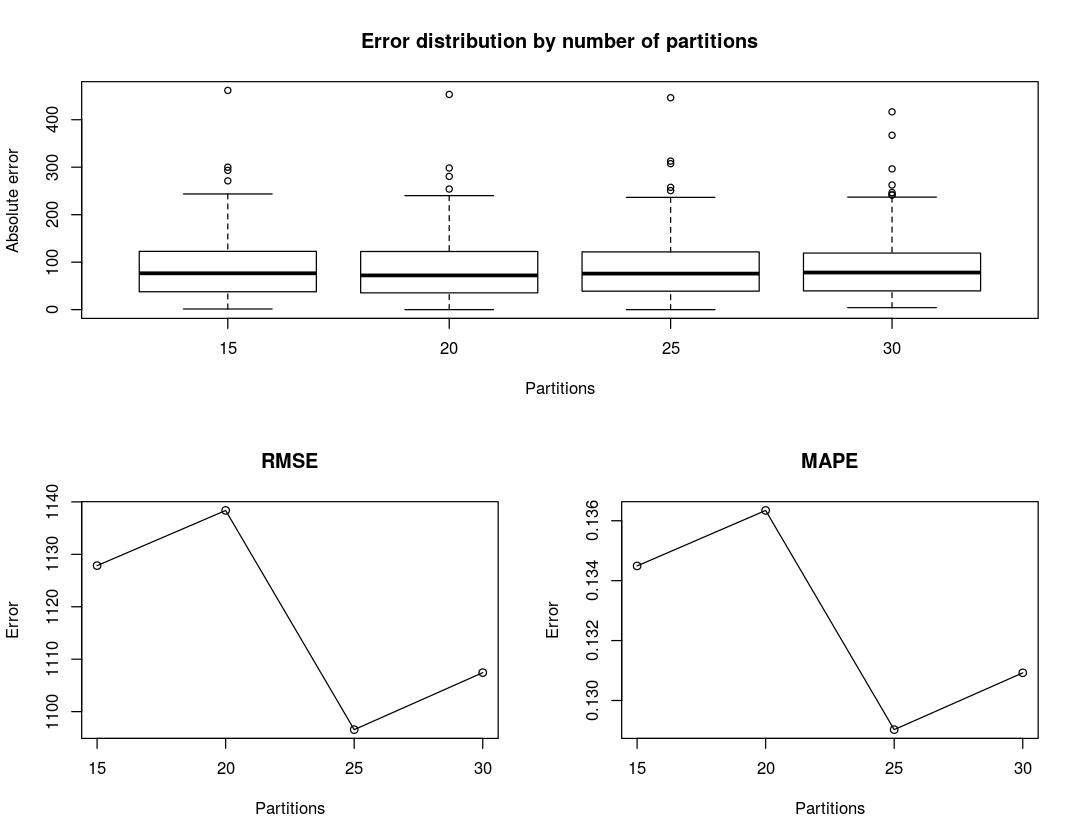

In [83]:
testPartitionsInterval(FitPWFTS, taiex,"Date","avg", c(10,15,20,25,30), 0.8)

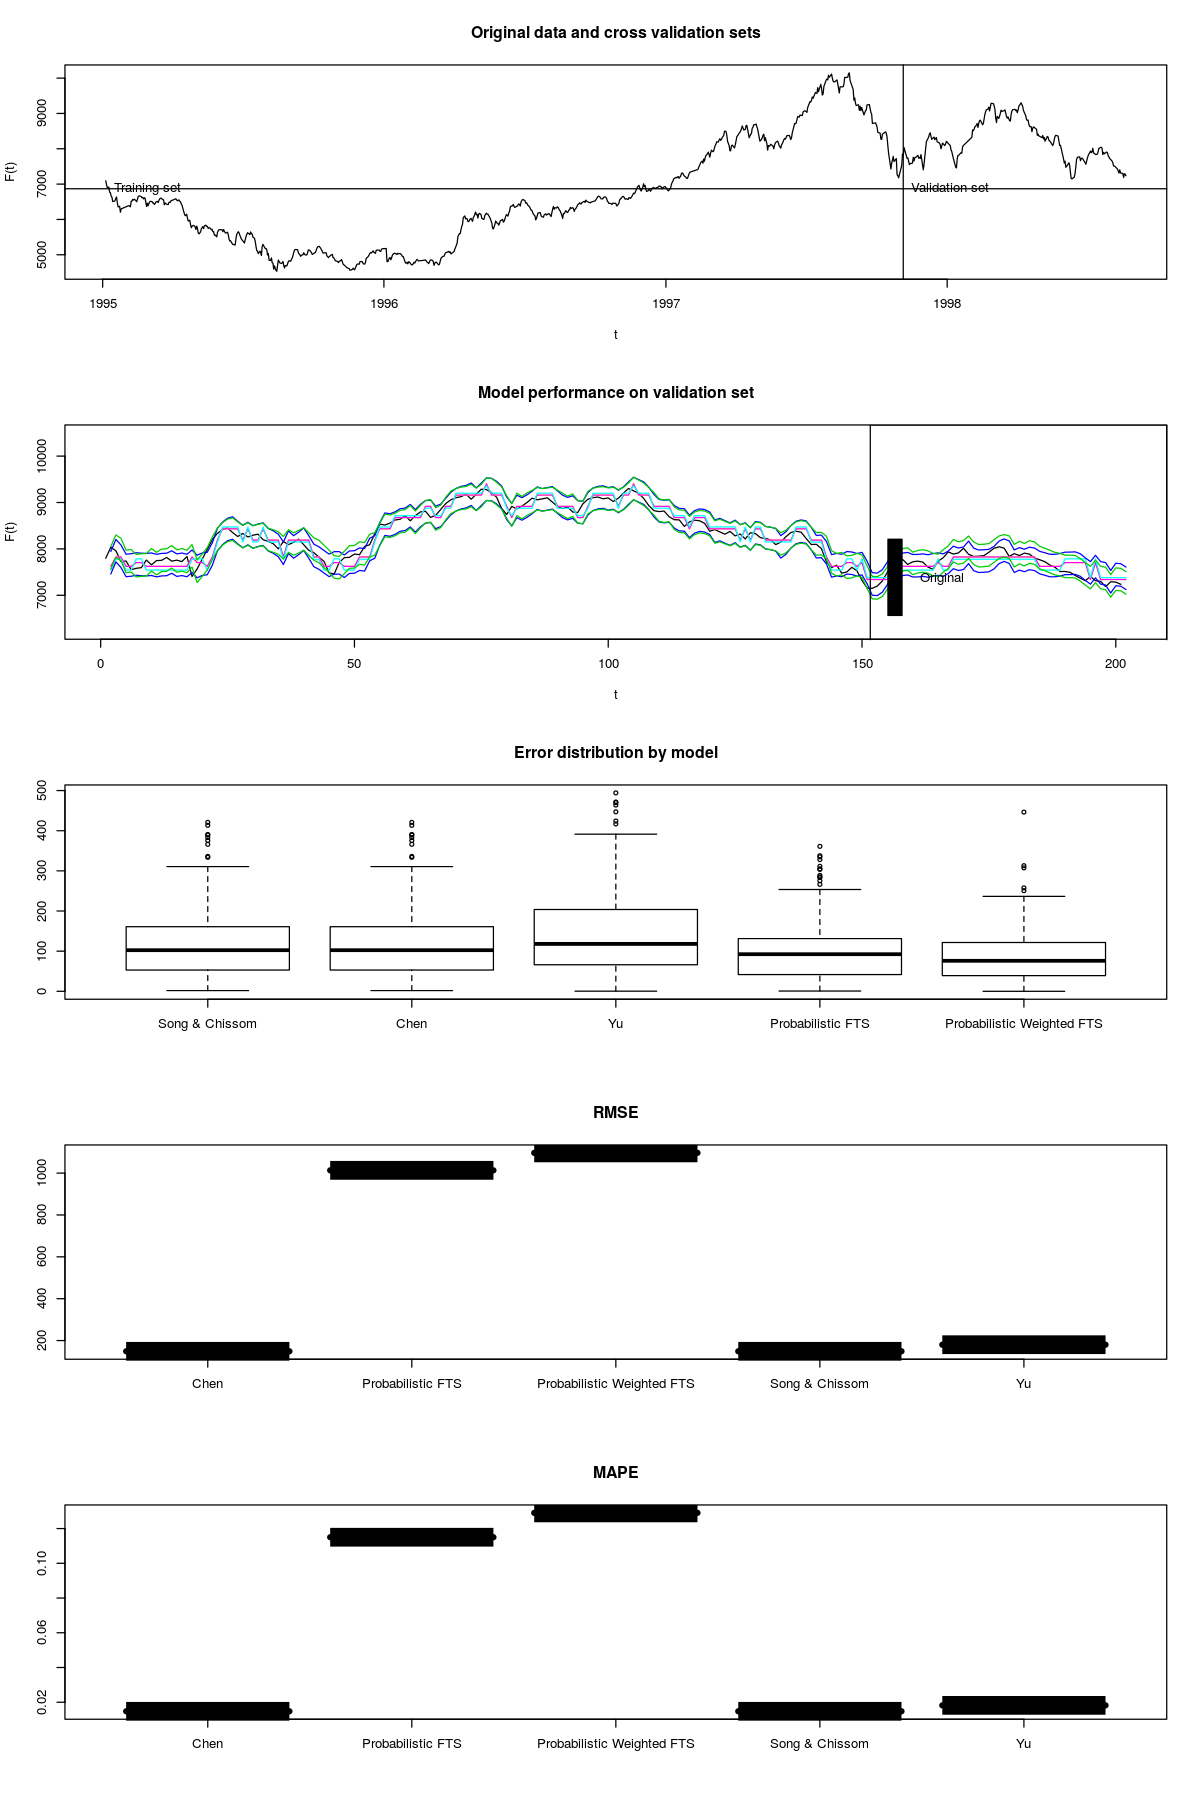

In [127]:
benchmarkAll(taiex,"Date","avg", c(25,25,25,25,25), 0.8)

In [34]:
subset <- taiex$avg[2500:4500]
dates <-taiex$Date[2500:4500]

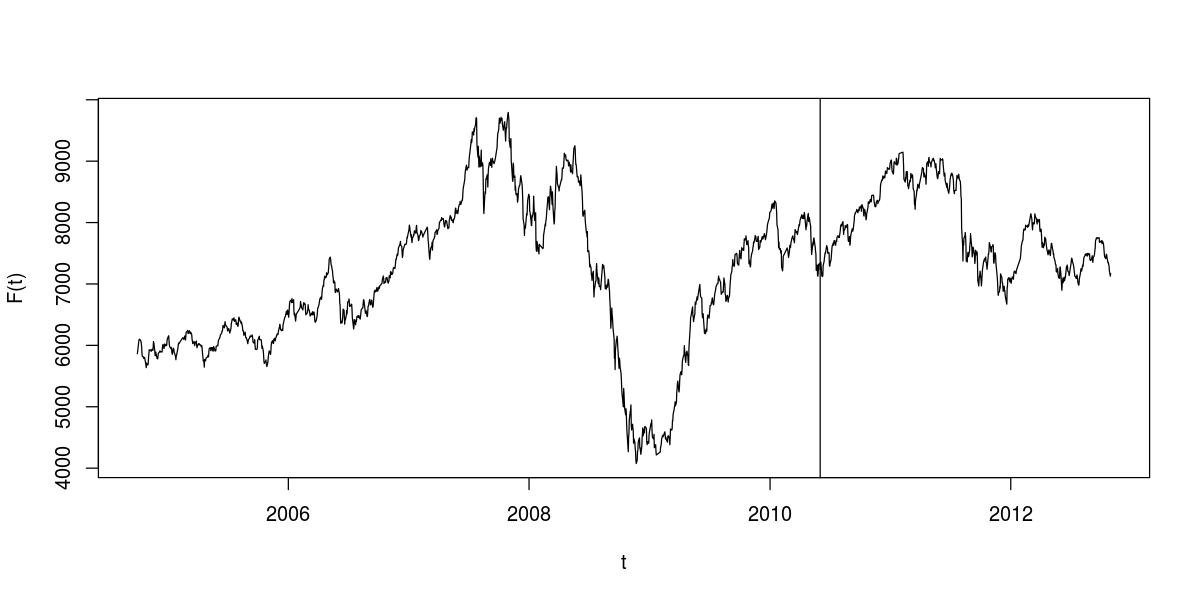

In [35]:
plot(dates,subset,type="l",xlab="t",ylab="F(t)",lwd=1)
abline(v=dates[1400])

[1] "Chen & 62.9132637005481  & 0.00661395894485408 \\ \\hline"
[1] "Yu & 46.0091402876454  & 0.005029072183069 \\ \\hline"
[1] "Ismail & Efendi & 45.7940636164379  & 0.00500481708260309 \\ \\hline"
[1] "Sadaei & 52.0640885326006  & 0.00538933522868308 \\ \\hline"
[1] "RMSE/MAPE: 40.3370668483413 & 0.00388071347534935 \\ \\hline"
[1] "Sharp/Res: 787.29535767471 & 99.4867774965328"
[1] "Coverage: 1"


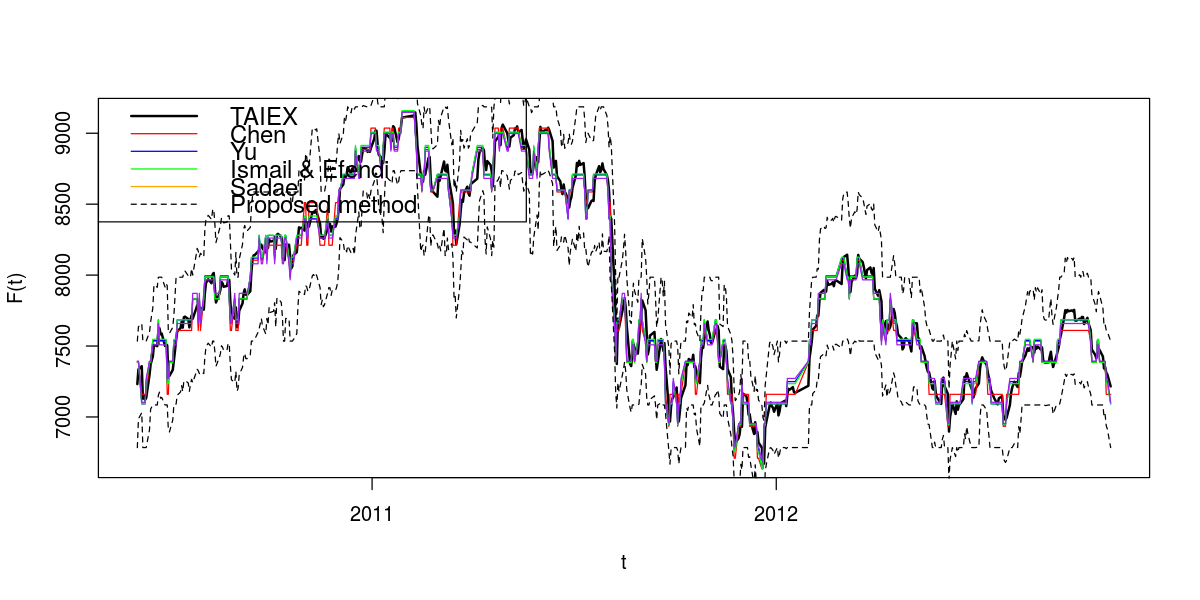

In [43]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

partitions <- 40

window <- 600


trainData <- subset[1:1400]
testData <- subset[1400:(1400 + window)]
testDates <- dates[1401:(1400 + window)]

index <- seq(2,1 + window,1)

options(repr.plot.width=10, repr.plot.height=5)


plot(testDates,testData[1:window],type="l",xlab="t",ylab="F(t)",lwd=2) 

l <- length(subset)

##### FTS - CHEN

executaTeste(FitChenFTS,partitions,NULL, trainData, testData, testDates, index, "red", 1, 1)

##### WFTS - YU

executaTeste(FitYuFTS,partitions,NULL, trainData, testData, testDates, index, "blue", 1, 1)

##### IWFTS - Ismail & Efendi

executaTeste(FitEfendiFTS,partitions,NULL, trainData, testData, testDates, index, "green", 1, 1)

##### EWFTS - Sadaei

executaTeste(FitSadaeiFTS,partitions,1.2, trainData, testData, testDates, index, "purple", 1, 1)

##### IFTS - Interval FTS

executaTesteInterval(FitIFTS,partitions,NULL, trainData, testData, testDates, index, "black", 2, 1)

legend("topleft",
       legend=c("TAIEX",fts$name, wfts$name, efts$name, sfts$name,"Proposed method"), 
       col=c("black","red","blue","green","orange","black"), 
       lty=c(1,1,1,1,1,2), lwd=c(2,1,1,1,1,1),
       cex=1.2)



[1] "RMSE/MAPE: 5.19792864697744e-13 & 2.449941971197e-17 \\ \\hline"
[1] "Pinball: 0.050065 & 0.039485 & 0.031635 & 0.031635 & 0.039485 & 0.050065"
[1] "Sharp/Res: 864.135688888889 & 8.42753175150288e-13"
[1] "RMSE/MAPE: 85.3088358107151 & 0.00782559851888236 \\ \\hline"
[1] "Pinball: 0.051055 & 0.040285 & 0.03223 & 0.023055 & 0.028755 & 0.03643"
[1] "Sharp/Res: 758.996468656715 & 98.6147175725844"
[1] "RMSE/MAPE: 42.9087313881066 & 0.00276165065761557 \\ \\hline"
[1] "Pinball: 0.036715 & 0.028945 & 0.023175 & 0.02217 & 0.027725 & 0.0351"
[1] "Sharp/Res: 622.948041432836 & 105.921791745749"
[1] "RMSE/MAPE: 52.2347293114062 & 0.00437312953319756 \\ \\hline"
[1] "Pinball: 0.03709 & 0.02932 & 0.023445 & 0.01951 & 0.024295 & 0.030795"
[1] "Sharp/Res: 584.990719292424 & 102.054620564398"
[1] "RMSE/MAPE: 72.1146103205679 & 0.00721309484601351 \\ \\hline"
[1] "Pinball: 0.038225 & 0.030115 & 0.02414 & 0.017165 & 0.021415 & 0.027155"
[1] "Sharp/Res: 565.116479601992 & 144.084286478059"
[1] "RM

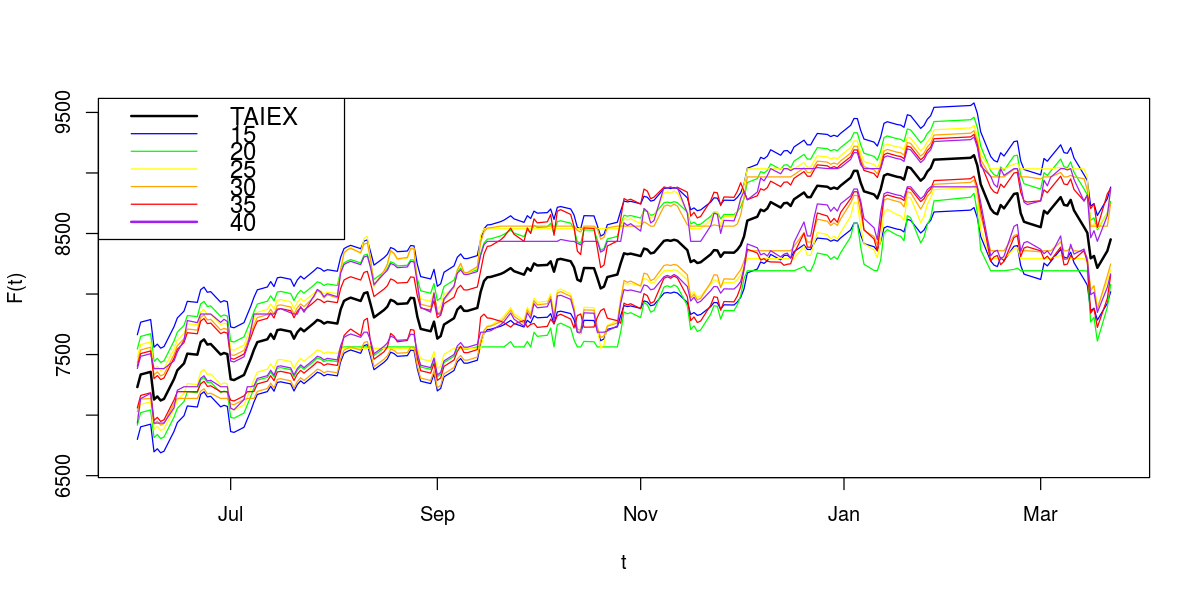

In [11]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

window <- 200


trainData <- subset[1:1400]
testData <- subset[1400:(1400 + window)]
testDates <- dates[1401:(1400 + window)]

index <- seq(2,1 + window,1)

options(repr.plot.width=10, repr.plot.height=5)


plot(testDates,testData[1:window],type="l",xlab="t",ylab="F(t)",lwd=2,ylim=c(6600,9500)) 

executaTesteInterval(FitIFTS,15,NULL, trainData, testData, testDates, index, "blue", 1, 1)
executaTesteInterval(FitIFTS,20,NULL, trainData, testData, testDates, index, "green", 1, 1)
executaTesteInterval(FitIFTS,25,NULL, trainData, testData, testDates, index, "yellow", 1, 1)
executaTesteInterval(FitIFTS,30,NULL, trainData, testData, testDates, index, "orange", 1, 1)
executaTesteInterval(FitIFTS,35,NULL, trainData, testData, testDates, index, "red", 1, 1)
executaTesteInterval(FitIFTS,40,NULL, trainData, testData, testDates, index, "purple", 1, 1)

legend("topleft",
       legend=c("TAIEX","15", "20", "25", "30","35","40"), 
       col=c("black","blue","green","yellow","orange","red","purple"), 
       lty=c(1,1,1,1,1,1), lwd=c(2,1,1,1,1,1),
       cex=1.2)


In [46]:
subset <- nasdaq$avg[1:2000]
dates <-nasdaq$Date[1:2000]

[1] "2001-01-02"

[1] "2008-12-15"

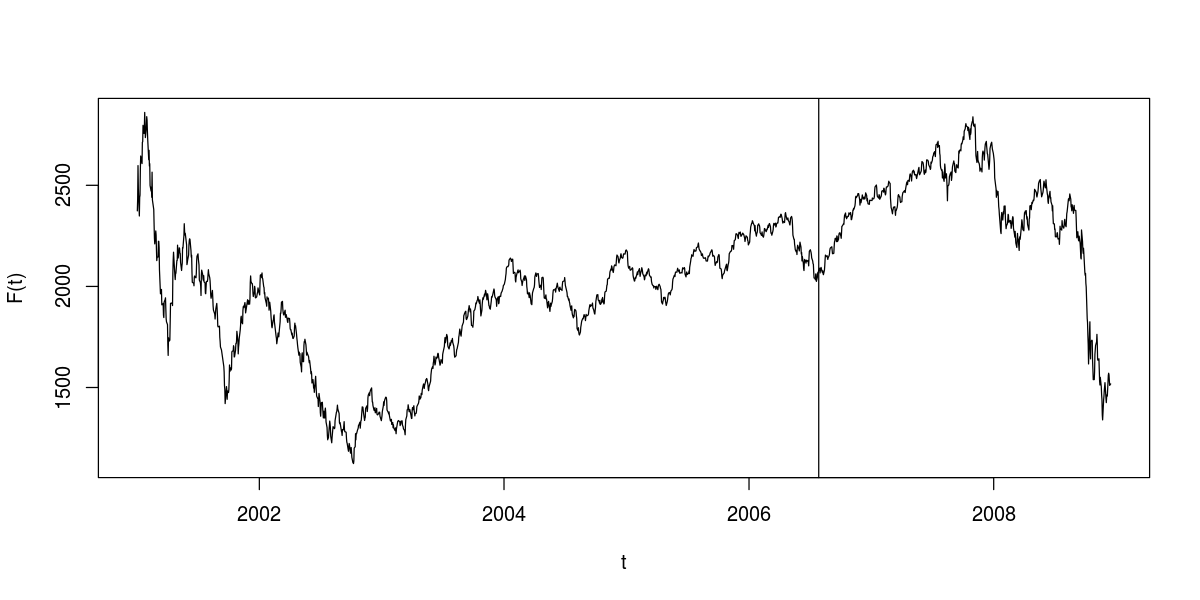

In [54]:
#plot(nasdaq$avg,type="l",xlab="t",ylab="F(t)",lwd=1)
#abline(v=dates[1400])

dates[1]
dates[2000]

plot(dates,subset,type="l",xlab="t",ylab="F(t)",lwd=1)
abline(v=dates[1400])

[1] "Chen & 44.8554992306021  & 0.015223088797818 \\ \\hline"
[1] "Yu & 47.7457388546776  & 0.0151025404566483 \\ \\hline"
[1] "Ismail & Efendi & 49.4294499504137  & 0.0155829427246711 \\ \\hline"
[1] "Sadaei & 48.6156537043012  & 0.0156144799885389 \\ \\hline"
[1] "RMSE/MAPE: 31.743376434609 & 0.0107034652849989 \\ \\hline"
[1] "Sharp/Res: 210.119979617305 & 36.9887831550856"
[1] "Coverage: 0.944908180300501"


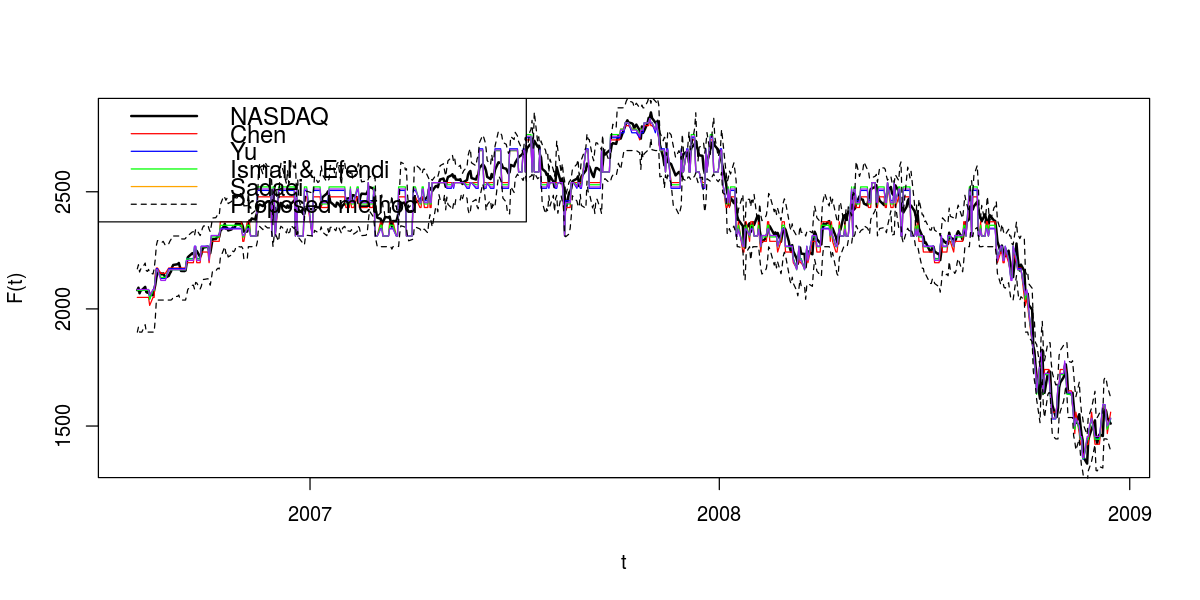

In [52]:
source("/home/petronio/dados/Dropbox/Doutorado/Disciplinas/AdvancedFuzzyTimeSeriesModels/rfts/FTS.r")

partitions <- 40

window <- 600


trainData <- subset[1:1400]
testData <- subset[1400:(1400 + window)]
testDates <- dates[1401:(1400 + window)]

index <- seq(2,1 + window,1)

options(repr.plot.width=10, repr.plot.height=5)


plot(testDates,testData[1:window],type="l",xlab="t",ylab="F(t)",lwd=2) 

l <- length(subset)

##### FTS - CHEN

executaTeste(FitChenFTS,partitions,NULL, trainData, testData, testDates, index, "red", 1, 1)

##### WFTS - YU

executaTeste(FitYuFTS,partitions,NULL, trainData, testData, testDates, index, "blue", 1, 1)

##### IWFTS - Ismail & Efendi

executaTeste(FitEfendiFTS,partitions,NULL, trainData, testData, testDates, index, "green", 1, 1)

##### EWFTS - Sadaei

executaTeste(FitSadaeiFTS,partitions,1.2, trainData, testData, testDates, index, "purple", 1, 1)

##### IFTS - Interval FTS

executaTesteInterval(FitIFTS,partitions,NULL, trainData, testData, testDates, index, "black", 2, 1)

legend("topleft",
       legend=c("NASDAQ",fts$name, wfts$name, efts$name, sfts$name,"Proposed method"), 
       col=c("black","red","blue","green","orange","black"), 
       lty=c(1,1,1,1,1,2), lwd=c(2,1,1,1,1,1),
       cex=1.2)

